In [29]:
from tams_pr2_guzheng.paths import RuckigPath
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy.stats as stats
import seaborn as sns

from tams_pr2_guzheng.msg import RunEpisodeActionResult

In [2]:
%load_ext autoreload
%autoreload 1
import sys
if '../utils' not in sys.path:
    sys.path.append('../utils')
import u
%aimport u

In [25]:
D=pd.read_json('../../../../data/20230721 - 13 strings explored/plucks.json')

In [ ]:
import rospy
rospy.init_node('jupyter_record_run_episode_results')
Samples= []
def new_run_episode_result(msg : RunEpisodeActionResult):
    if len(msg.result.onsets) > 0:
        loudness = msg.result.onsets[0].loudness
        detected_note = msg.result.onsets[0].note
    else:
        loudness = 0.0
        detected_note = ''
    Samples.append({
        'finger': msg.result.finger,
        'onset_cnt': len(msg.result.loudness),
        'loudness': loudness,
        'detected_note': detected_note,
        *RuckigPath.from_action_parameters(msg.result.action_parameters).params_map()
        })
    D= pd.DataFrame(Samples, columns=['finger', 'loudness'])
run_episode_result_sub= rospy.Subscriber('/run_episode/goal', RunEpisodeActionGoal, new_run_episode_result)

In [27]:
X=D[['string', 'pre_y', 'string_position', 'loudness']]
X.describe()

,pre_y,string_position,loudness
count,1862.000000,1.862000e+03,1296.000000
mean,-0.000068,1.438063e-01,49.182196
std,0.007002,1.181698e-01,8.147607
min,-0.007000,2.485000e-07,21.543703
25%,-0.007000,4.304107e-02,44.196374
50%,-0.007000,1.233734e-01,49.810511
75%,0.007000,2.229726e-01,55.043307
max,0.007000,4.728214e-01,65.927208


In [5]:
X= X.sort_values('string', key= lambda x: x.map(lambda a: librosa.note_to_midi(u.string_to_note(a))))

In [6]:
# new column 'direction' with values 'inwards' and 'outwards' depending on the sign of pre_y
X['pluck direction']= X['pre_y'].map(lambda y: 'inwards' if y < 0.0 else 'outwards')

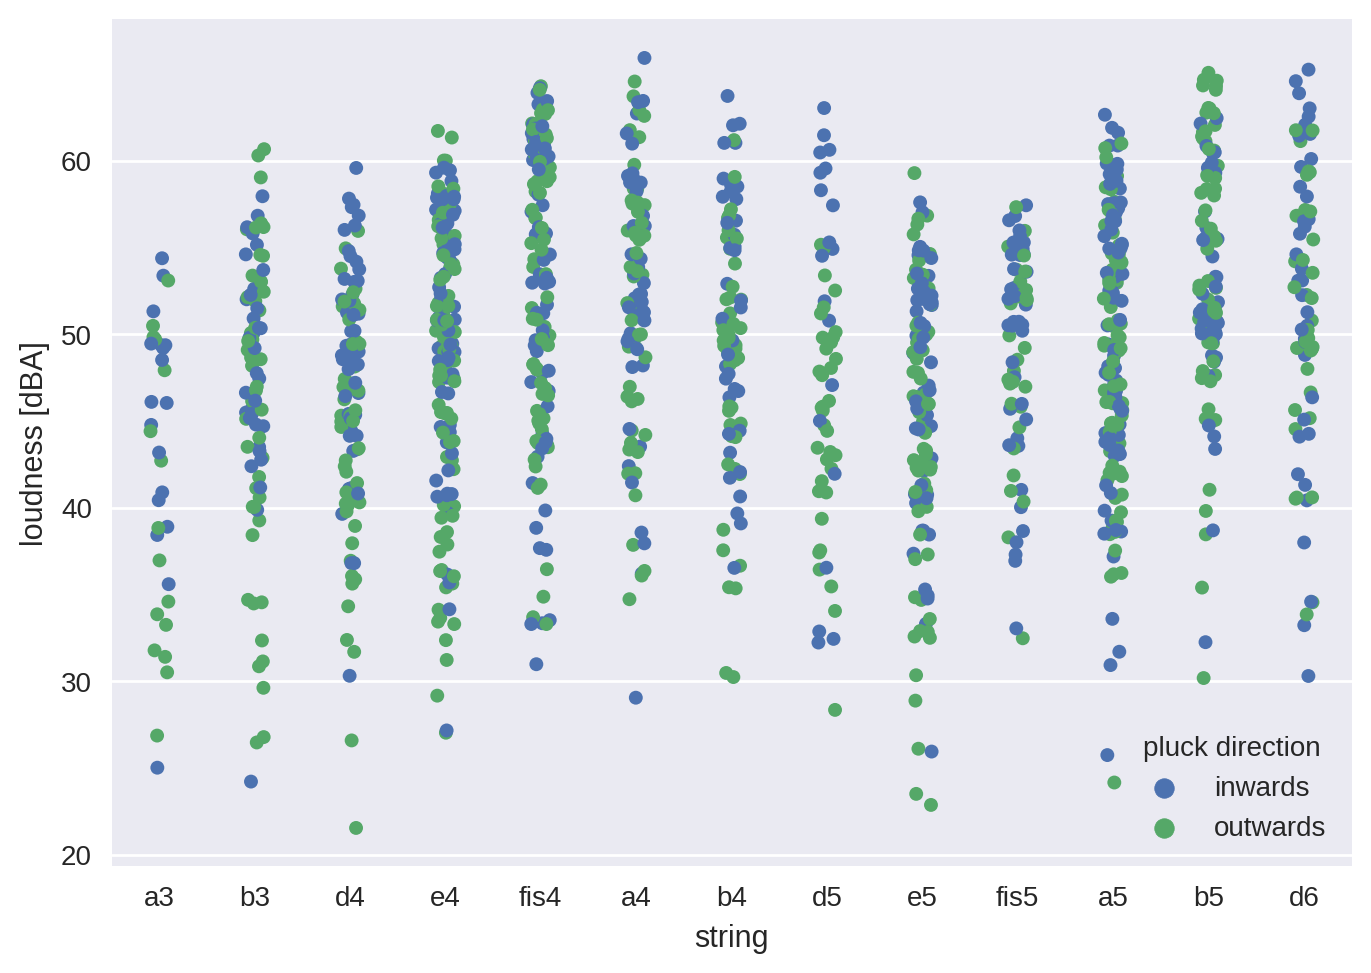

In [23]:
plt.figure(dpi=200)
ax = sns.stripplot(x=X['string'], y=X['loudness'], hue= X['pluck direction']);
#ax = sns.violinplot(x=X['string'], y=X['loudness'], hue= X['pluck direction'], split=True, bw=0.2);
plt.ylabel('loudness [dBA]')
plt.savefig('/tmp/plucks_loudness.png', dpi=300)

In [ ]:

plt.savefig('/tmp/plucks_explore.png', dpi=300)